<a href="https://colab.research.google.com/github/D1dix/proyecto_IAs/blob/main/01-numpy-analisis/Temperaturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_estaciones, n_dias, n_horas, n_vars = 5, 30, 24, 6
datos = np.zeros((n_estaciones, n_dias, n_horas, n_vars))

# Temperatura base por estación + variación diaria + ruido
temp_base = np.array([8, 12, 14, 10, 6]).reshape(5,1,1)
hora = np.arange(24).reshape(1,1,24)
variacion_diaria = 5 * np.sin((hora - 6) * np.pi / 12)
datos[:,:,:,0] = temp_base + variacion_diaria + np.random.normal(0, 2,
(5,30,24))

# Resto de variables (humedad, presión, viento, precipitación, radiación)
datos[:,:,:,1] = np.clip(70 - datos[:,:,:,0] + np.random.normal(0, 10,(5,30,24)), 30, 100)

datos[:,:,:,2] = 1013 + np.random.normal(0, 5, (5,30,24))
datos[:,:,:,3] = np.abs(np.random.normal(15, 10, (5,30,24)))
datos[:,:,:,4] = np.maximum(0, np.random.exponential(2, (5,30,24)))
radiacion_base = np.maximum(0, 400 * np.sin((hora - 6) * np.pi / 12))
datos[:,:,:,5] = np.clip(radiacion_base + np.random.normal(0, 50, (5,30,24)),0, 800)

estaciones = ["Madrid", "Barcelona", "Sevilla", "Bilbao", "Granada"]
colores = ["tab:red", "tab:blue", "tab:orange", "tab:green", "tab:purple"]



# **Bloque 1: Exploración y acceso a datos**

**Ejercicio 1. Verificación de estructura**

Muestra la forma (shape) del array, el número total de mediciones y el tipo de datos
(dtype). ¿Cuántas mediciones individuales contiene el dataset?

**Ejercicio 2. Extracción de series temporales**

Extrae la serie de temperaturas de Madrid-Retiro durante el día 15. El resultado debe ser un array de 24 elementos.

**Ejercicio 3. Comparativa entre estaciones**

Extrae las temperaturas de todas las estaciones a las 12:00 del día 20. El resultado
debe ser un array de 5 elementos.

**Ejercicio 4. Bloque de datos**

Extrae todos los datos de Barcelona durante la primera semana (días 0-6). ¿Cuál es la
forma del array resultante?


In [ ]:
# Ejer: 1
print(f"Forma del array: {datos.shape}")
print(f"Número total de mediciones: {datos.size}")
print(f"Tipo de datos: {datos.dtype}")

# Ejer: 2
temp_madrid_retiro = datos[0, 15, :, 0]
print(f"Serie de temperaturas de Madrid-Retiro durante el día 15: {temp_madrid_retiro}")
print(f"Forma del array: {temp_madrid_retiro.shape}")

# Ejer: 3
temp_todas_estaciones = datos[:, 20, 12, 0]
print(f"Temperaturas de todas las estaciones a las 12:00 del día 20: {temp_todas_estaciones}")
print(f"Forma del array: {temp_todas_estaciones.shape}")

# Ejer: 4
prim_sem_barcelona = datos[1, 0:7, :, :]
print(f"Forma del array: {prim_sem_barcelona.shape}")

Forma del array: (5, 30, 24, 6)
Número total de mediciones: 21600
Tipo de datos: float64
Serie de temperaturas de Madrid-Retiro durante el día 15: [ 4.03869303  6.23584869  3.45235268  5.26788954  6.88028798  5.90346383
  8.44818496  9.31928003 10.6953522   9.98951434 12.37914737 13.82562571
 15.90228722 14.74817078 16.63649193 10.00083878 12.24464127  9.66077924
 12.37960587  5.0893082   3.82055632  3.2656808  -0.57791847  2.11886083]
Forma del array: (24,)
Temperaturas de todas las estaciones a las 12:00 del día 20: [13.15473662 15.56318547 18.06937909 16.02158418 13.9018551 ]
Forma del array: (5,)
Forma del array: (7, 24, 6)


# **Bloque 2: Estadística descriptiva**

**Ejercicio 5. Temperatura media por estación**

Calcula la temperatura media de todo el mes para cada estación. El resultado debe ser un array de 5 elementos. ¿Qué estación es más cálida? ¿Cuál más fría?

**Ejercicio 6. Perfil horario medio**

Calcula la temperatura media de todas las estaciones para cada hora del día
(promediando todos los días). El resultado debe ser un array de 24 elementos que
muestre el perfil térmico diario típico.

**Ejercicio 7. Variabilidad climática**

Calcula la desviación estándar de la temperatura para cada estación. ¿Qué estación presenta mayor variabilidad térmica?

**Ejercicio 8. Extremos meteorológicos**

Encuentra la temperatura máxima y mínima registradas en todo el dataset. Indica en qué estación, día y hora se produjeron (pista: usa np.argmax/np.argmin y
np.unravel_index).

Temperatura media por estación: [ 7.97979927 12.17957761 14.05481385 10.05142752  6.00037658]
La estación más cálida es la estación Sevilla
La estación más fría es la estación Granada
Perfil horario medio de temperatura: [ 5.03030346  5.15957045  5.47876169  6.51047736  7.64368656  9.00376843
 10.22693188 11.22172575 12.54605061 13.54669175 14.12382854 14.95674594
 15.18853598 14.8724688  14.36788922 13.68001046 12.35216023 11.69066635
 10.17147117  8.84390555  7.55498809  6.14391655  5.63976116  5.32245924]
Forma del array: (24,)


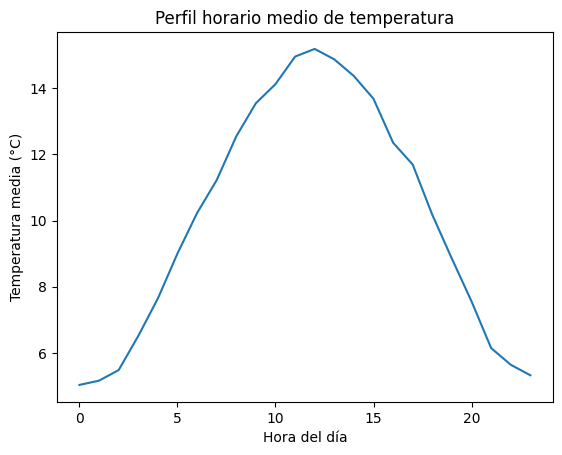

Desviación estándar de la temperatura por estación: [4.1079113  4.01935776 4.11146254 4.05992189 4.09005996]
La estación con mayor variabilidad es la estación Sevilla


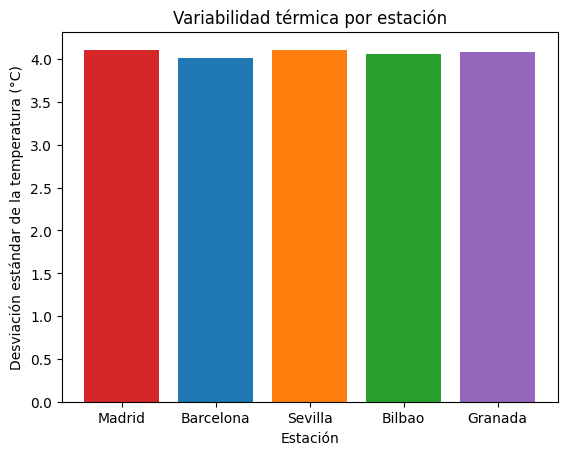

Temperatura máxima: 25.105126198765326 en estación Sevilla, día 21, hora 13
Temperatura mínima: -4.189024398926728 en estación Granada, día 23, hora 22


In [ ]:
# Ejer: 5
temp_media_estacion = np.mean(datos[:, :, :, 0], axis=(1, 2))

print(f"Temperatura media por estación: {temp_media_estacion}")
print(f"La estación más cálida es la estación {estaciones[np.argmax(temp_media_estacion)]}")
print(f"La estación más fría es la estación {estaciones[np.argmin(temp_media_estacion)]}")

# Ejer: 6
perfil_horario = np.mean(datos[:, :, :, 0], axis=(0, 1))

print(f"Perfil horario medio de temperatura: {perfil_horario}")
print(f"Forma del array: {perfil_horario.shape}")

horas = np.arange(24)

plt.figure()
plt.plot(horas, perfil_horario)
plt.xlabel("Hora del día")
plt.ylabel("Temperatura media (°C)")
plt.title("Perfil horario medio de temperatura")
plt.show()

# Ejer: 7
std_temp_estacion = np.std(datos[:, :, :, 0], axis=(1, 2))

print(f"Desviación estándar de la temperatura por estación: {std_temp_estacion}")
print(f"La estación con mayor variabilidad es la estación {estaciones[np.argmax(std_temp_estacion)]}")

plt.figure()
plt.bar(estaciones, std_temp_estacion, color=colores)
plt.xlabel("Estación")
plt.ylabel("Desviación estándar de la temperatura (°C)")
plt.title("Variabilidad térmica por estación")
plt.show()

# Ejer: 8
temp = datos[:, :, :, 0]

max_temp = np.max(temp)
min_temp = np.min(temp)

idx_max = np.unravel_index(np.argmax(temp), temp.shape)
idx_min = np.unravel_index(np.argmin(temp), temp.shape)

print(f"Temperatura máxima: {max_temp} en estación {estaciones[idx_max[0]]}, día {idx_max[1]}, hora {idx_max[2]}")
print(f"Temperatura mínima: {min_temp} en estación {estaciones[idx_min[0]]}, día {idx_min[1]}, hora {idx_min[2]}")



# **Bloque 3: Filtrado y selección condicional**

**Ejercicio 9. Detección de heladas**

Crea una máscara booleana que identifique todas las mediciones con temperatura
inferior a 0°C. ¿Cuántas heladas se registraron en total? ¿Qué porcentaje del total de mediciones representa?

**Ejercicio 10. Días de lluvia significativa**

Identifica los días en los que la precipitación acumulada diaria (suma de las 24 horas) superó los 10 mm en alguna estación. Muestra qué estaciones y qué días.

**Ejercicio 11. Condiciones de confort**

Define condiciones de confort como: temperatura entre 18°C y 24°C, humedad entre
40% y 60%, y viento inferior a 20 km/h. ¿Qué porcentaje de mediciones cumplen las tres condiciones simultáneamente?

In [13]:
# Ejer: 9

temp = datos[:, :, :, 0]

heladas = temp < 0

num_heladas = np.sum(heladas)
total_mediciones = temp.size
porcentaje_heladas = (num_heladas / total_mediciones) * 100

print(f"Número total de heladas: {num_heladas}")
print(f"Porcentaje sobre el total: {porcentaje_heladas:.2f}%")

# Ejer: 10

precipitacion = datos[:, :, :, 4]

prec_diaria = np.sum(precipitacion, axis=2)

lluvia_significativa = prec_diaria > 10

estaciones, dias = np.where(lluvia_significativa)

for est, dia in zip(estaciones, dias):
    print(f"Lluvia significativa en estación {est}, día {dia}")

# Ejer: 11

temp = datos[:, :, :, 0]
hum = datos[:, :, :, 1]
viento = datos[:, :, :, 3]

cond_temp = (temp >= 18) & (temp <= 24)
cond_hum = (hum >= 40) & (hum <= 60)
cond_viento = viento < 20

confort = cond_temp & cond_hum & cond_viento

porcentaje_confort = (np.sum(confort) / temp.size) * 100

print(f"Porcentaje de mediciones en condiciones de confort: {porcentaje_confort:.2f}%")


Número total de heladas: 62
Porcentaje sobre el total: 1.72%
Lluvia significativa en estación 0, día 0
Lluvia significativa en estación 0, día 1
Lluvia significativa en estación 0, día 2
Lluvia significativa en estación 0, día 3
Lluvia significativa en estación 0, día 4
Lluvia significativa en estación 0, día 5
Lluvia significativa en estación 0, día 6
Lluvia significativa en estación 0, día 7
Lluvia significativa en estación 0, día 8
Lluvia significativa en estación 0, día 9
Lluvia significativa en estación 0, día 10
Lluvia significativa en estación 0, día 11
Lluvia significativa en estación 0, día 12
Lluvia significativa en estación 0, día 13
Lluvia significativa en estación 0, día 14
Lluvia significativa en estación 0, día 15
Lluvia significativa en estación 0, día 16
Lluvia significativa en estación 0, día 17
Lluvia significativa en estación 0, día 18
Lluvia significativa en estación 0, día 19
Lluvia significativa en estación 0, día 20
Lluvia significativa en estación 0, día 21
Llu